In [1]:
from nb_imports import *
%matplotlib inline
import csvReader
import config
import lib
from dataprocessingutil import isCommentInString
FIELDS = ["comments", "blank_lines", "code", "config", "yaml_encoding_error", "code_with_comments", "lines", "percentage", "stars", "sub", "data", "id"]
dtypes = {"comments":int, "blank_lines":int, "code":int, "config":str, 
          "yaml_encoding_error":str, "code_with_comments":int, "lines":int, "percentage":float, "stars":int, "sub":int, "data":str, "id":int}
# csvfiledata = csvReader.readfile("yaml threaded.csv", fields=FIELDS)

In [2]:
df = pd.read_csv("yaml threaded.csv", dtype=dtypes)


In [3]:
df.head(5)



,comments,blank_lines,code,config,lang,yaml_encoding_error,code_with_comments,lines,percentage,stars,sub,data,id
0,0,8,50,travis,b'Python',NaN,1,57,0.000000,4039,118,ZGlzdDogdHJ1c3R5CgpsYW5ndWFnZTogcHl0aG9uCgpjYW...,2337852
1,0,2,9,travis,b'Java',NaN,0,11,0.000000,4039,128,bGFuZ3VhZ2U6IGphdmEKamRrOiBvcmFjbGVqZGs3CmVudj...,44498352
2,2,12,79,travis,b'PHP',NaN,5,86,2.325581,4038,250,IyBUcmF2aXMgQ0kgQ29uZmlndXJhdGlvbiBGaWxlCgojIF...,10420996
3,1,0,19,travis,b'JavaScript',NaN,0,19,5.263158,4039,163,c3VkbzogZmFsc2UKbGFuZ3VhZ2U6IG5vZGVfanMKb3M6Ci...,66830040
4,0,8,28,circleci,b'JavaScript',NaN,0,36,0.000000,4039,163,dmFyXzE6ICZjYWNoZV9rZXkgc2FuLWRlcGVuZGVuY3ktY2...,66830040


In [4]:
df.describe()

,comments,blank_lines,code,code_with_comments,lines,percentage,stars,sub,id
count,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,1.909000e+04
mean,1.107438,5.160503,42.570980,1.887218,45.844264,2.005904,2948.444683,128.414772,4.457911e+07
std,5.205508,8.020843,92.849441,7.268462,94.177228,6.499269,5450.030241,233.494508,4.506814e+07
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,500.000000,1.000000,2.700000e+01
25%,0.000000,1.000000,12.000000,0.000000,14.000000,0.000000,704.000000,33.000000,8.495705e+06
50%,0.000000,3.000000,22.000000,0.000000,25.000000,0.000000,1217.000000,62.000000,2.962040e+07
75%,0.000000,7.000000,42.000000,1.000000,47.000000,0.000000,2884.000000,127.000000,6.706757e+07
max,276.000000,281.000000,5620.000000,295.000000,5583.000000,84.782609,92440.000000,5075.000000,2.222280e+08


In [5]:
df.sample(1000).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 11775 to 2634
Data columns (total 13 columns):
comments               1000 non-null int32
blank_lines            1000 non-null int32
code                   1000 non-null int32
config                 1000 non-null object
lang                   994 non-null object
yaml_encoding_error    2 non-null object
code_with_comments     1000 non-null int32
lines                  1000 non-null int32
percentage             1000 non-null float64
stars                  1000 non-null int32
sub                    1000 non-null int32
data                   1000 non-null object
id                     1000 non-null int32
dtypes: float64(1), int32(8), object(4)
memory usage: 78.1+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 13 columns):
comments               19090 non-null int32
blank_lines            19090 non-null int32
code                   19090 non-null int32
config                 19090 non-null object
lang                   18915 non-null object
yaml_encoding_error    57 non-null object
code_with_comments     19090 non-null int32
lines                  19090 non-null int32
percentage             19090 non-null float64
stars                  19090 non-null int32
sub                    19090 non-null int32
data                   19090 non-null object
id                     19090 non-null int32
dtypes: float64(1), int32(8), object(4)
memory usage: 1.3+ MB


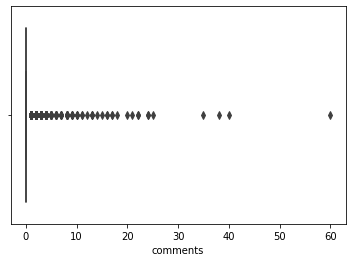

In [7]:
sns.boxplot(x="comments", data=df.sample(1000))

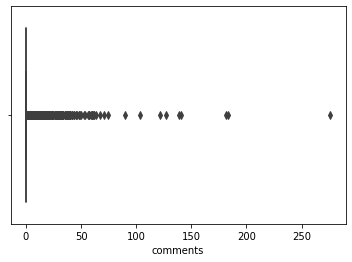

In [8]:
sns.boxplot(x="comments",data=df)

In [9]:
comment_stats = []
comment_stats_no_zero = []
for key in config.PATHS.keys():
    for line in csvfiledata:
        data = line.get("{}{}".format(key, 0))
        if data:
            fileasstring = lib.base64Decode(data)
            if fileasstring:
                yaml_file_lines = fileasstring.split("\n")
                comments = 0
                blank_lines = 0
                code_with_comments = 0
                code = 0

                for yaml_line in yaml_file_lines:
                    yaml_line = yaml_line.replace(" ", "")
                    if isCommentInString(yaml_line):
                        comments += 1
                        if not yaml_line.startswith("#"):
                            code += 1
                            code_with_comments += 1
                    elif yaml_line == "":
                        blank_lines += 1
                    else:
                        code += 1
                
                
                node = {"comments": comments,
                 "blank_lines":blank_lines,
                 "code": code,
                 "code_with_comments":code_with_comments,
                 "lines":len(yaml_file_lines),
                 "percentage":(comments/len(yaml_file_lines))*100,
                 "stars": line["stargazers_count"], 
                 "sub": line.get("subscribers_count")}
                
                comment_stats.append(node)
                if comments != 0:
                    comment_stats_no_zero.append(node)

dataset = pd.DataFrame(comment_stats)
dataset = dataset.astype(dtype={'comments': int,
                                "blank_lines":int,
                                "code":int,
                                "code_with_comments":int,
                                'lines':int,
                                'percentage':float,
                                "sub":int,
                                "stars":int})
dataset.head(5)

NameError: name 'csvfiledata' is not defined

In [10]:
sns.scatterplot(x=dataset['lines'], y=dataset['percentage'])

NameError: name 'dataset' is not defined

In [11]:
sns.scatterplot(x=dataset['stars'], y=dataset['percentage'])


NameError: name 'dataset' is not defined

In [12]:
data_reduced = pd.DataFrame(comment_stats_no_zero)
data_reduced.head(5)


""


In [13]:
sns.scatterplot(x=data_reduced['lines'], y=data_reduced['percentage'])



KeyError: 'lines'

In [14]:

cat = dataset.sort_values(by=['percentage'], ascending=False)
dataset.head(4)

NameError: name 'dataset' is not defined

In [15]:
cat.head(4)

NameError: name 'cat' is not defined

In [16]:
sns.lineplot(x="stars", y="percentage", data=cat, sort=False)

NameError: name 'cat' is not defined

In [17]:
sns.lineplot(x="sub", y="percentage", data=cat, sort=False)

NameError: name 'cat' is not defined

In [18]:
plt.figure(figsize=(8, 5))
sns.regplot(x="stars", y="percentage", data=dataset);

NameError: name 'dataset' is not defined

<Figure size 576x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x="sub", y="percentage", data=dataset);

There is a very minor increase in number of comments per line of yaml configuration for build systems. This is particularly the case in projects which have more subscribers than stars.

In [ ]:
dataset.describe()

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=dataset);

In [ ]:
from scipy import stats
print(len(dataset))
_temp = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
print(len(_temp))
_temp.describe()

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]);

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x="lines", y="blank_lines", data=dataset[(np.abs(stats.zscore(dataset)) < 4).all(axis=1)]);

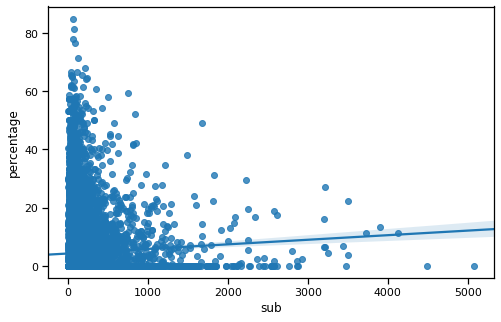

There is a very minor increase in number of comments per line of yaml configuration for build systems. This is particularly the case in projects which have more subscribers than stars.

In [79]:
dataset.describe()

,comments,blank_lines,code,code_with_comments,lines,percentage,stars,sub
count,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000,18605.000000
mean,3.023811,5.144907,37.856114,0.261005,45.763827,4.467653,2886.224456,126.946466
std,10.051668,8.055873,84.506167,1.158772,94.778295,8.883405,5293.281758,231.178356
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,500.000000,1.000000
25%,0.000000,1.000000,11.000000,0.000000,14.000000,0.000000,702.000000,33.000000
50%,0.000000,3.000000,20.000000,0.000000,25.000000,0.000000,1209.000000,62.000000
75%,2.000000,7.000000,38.000000,0.000000,46.000000,5.405405,2833.000000,126.000000
max,369.000000,281.000000,5137.000000,40.000000,5583.000000,84.782609,92440.000000,5075.000000


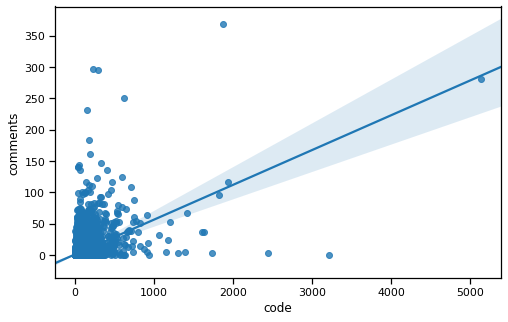

In [80]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=dataset);

In [85]:
from scipy import stats
print(len(dataset))
_temp = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
print(len(_temp))
_temp.describe()

18605
17154


,comments,blank_lines,code,code_with_comments,lines,percentage,stars,sub
count,17154.000000,17154.000000,17154.000000,17154.000000,17154.000000,17154.000000,17154.000000,17154.000000
mean,1.674420,4.355544,29.884808,0.143465,35.771307,3.253487,2256.777428,98.371983
std,3.945089,4.237488,33.611003,0.488779,37.976185,6.166230,2755.113161,111.935057
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,500.000000,1.000000
25%,0.000000,1.000000,11.000000,0.000000,13.000000,0.000000,694.000000,32.000000
50%,0.000000,3.000000,19.000000,0.000000,24.000000,0.000000,1164.500000,59.000000
75%,1.000000,6.000000,35.000000,0.000000,43.000000,4.166667,2611.000000,115.000000
max,33.000000,29.000000,290.000000,3.000000,326.000000,31.034483,18755.000000,820.000000


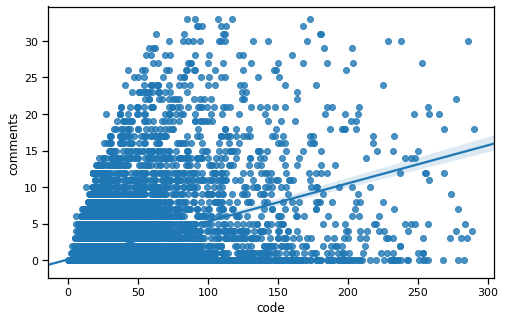

In [84]:
plt.figure(figsize=(8, 5))
sns.regplot(x="code", y="comments", data=dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]);

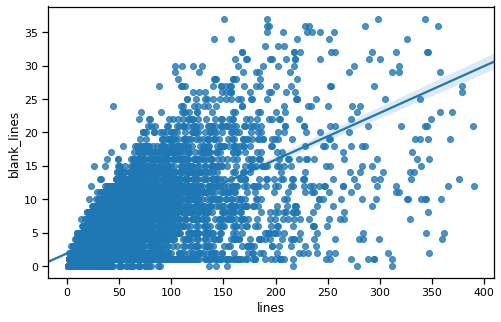

In [92]:
plt.figure(figsize=(8, 5))
sns.regplot(x="lines", y="blank_lines", data=dataset[(np.abs(stats.zscore(dataset)) < 4).all(axis=1)]);